# Spanish Housing Market
**by Tiffany Green**

In case you need a refresh on our project: We're looking at the effect of grassroots housing justice movements' actions in Spain. We're trying to understand what material changes have happened as a result of their organizing. Our approach will be to show the housing market conditions in Spain, then zoom into Barcelona where a lot of the housing justice action has been. There, we hope to see how the city is progressing after recent policy changes.

Today, I'll be looking at eviction data for the country of Spain. I accessed this data from the Spanish Judiciary; it is broken down into the Judicial Districts. These jurisdictions do not directly align with the geographic breakdowns of their census categoris and we have been unable to find shapefiles for the boundaries. So, I summarized the judicial district information into the larger boundary for provinces. I will map the total number of evictions within each province, as well as break down Barcelona provinces' type of evictions over 2013-2019.


So, here's what I need to do: 
1. Bring in the spatial data. 
1. Check and clean the spatial data. 
1. Bring in the eviction data. 
1. Check and clean the eviction data.
1. Merge the dataframes
1. Create a map of the total number of evictions by province. 
1. Create a chart of the different types of evictions in Barcelona over the years available. 

## Import libraries. 

I'll bring in the libraries to make it all work. 

In [1]:
# import libarary for dataframes
import pandas as pd
#import libarary for geo data
import geopandas as gpd
#import library to create some basemaps
import contextily as ctx
#for plotting extras
import matplotlib.pyplot as plt
# for interactive plots - hopefully!
import plotly.express as px

## Import & Clean Spatial Data

I'll start with the spatial dataframe. It will need to be trimmed and make sure the dtype is ready to merge into the eviction data.  

In [2]:
#import census spatial datafram
pdf = gpd.read_file('Eviction_Data/spain_provinces.dbf')
pdf.head()

,NPRO,OBJECTID,CUSEC,CUMUN,CSEC,CDIS,CMUN,CPRO,CCA,CUDIS,...,CNUT1,CNUT2,CNUT3,CLAU2,NCA,NMUN,Shape_Leng,Shape_area,Shape_len,geometry
0,Albacete,266,0200101001,02001,001,01,001,02,08,0200101,...,4,2,1,02001,Castilla-La Mancha,Abengibre,25251.671660,3.075662e+07,25251.671660,"POLYGON ((568861.458 4228498.857, 568863.454 4..."
1,Alicante,566,0300101001,03001,001,01,001,03,10,0300101,...,5,2,1,03001,Comunitat Valenciana,Adsubia,18371.502266,1.468415e+07,18371.502266,"MULTIPOLYGON (((701641.529 4201786.197, 701679..."
2,Almería,1798,0400101001,04001,001,01,001,04,01,0400101,...,6,1,1,04001,Andalucía,Abla,46583.545501,4.520873e+07,46583.545501,"MULTIPOLYGON (((519527.321 4060404.620, 519513..."
3,Araba/Álava,1,0100101001,01001,001,01,001,01,16,0100101,...,2,1,1,01001,País Vasco,Alegría-Dulantzi,34474.734278,1.551393e+07,34474.734278,"POLYGON ((537063.531 4703664.589, 536887.844 4..."
4,Asturias,24008,3300101001,33001,001,01,001,33,03,3300101,...,1,2,0,33001,Principado de Asturias,Allande,104641.075781,2.847532e+08,104641.075781,"POLYGON ((216722.702 4763101.374, 216759.909 4..."


In [3]:
#trim pdf to only include cpro and geometry. 
pdf_trimmed= pdf[['CPRO', 'geometry']]
pdf_trimmed.head()

,CPRO,geometry
0,02,"POLYGON ((568861.458 4228498.857, 568863.454 4..."
1,03,"MULTIPOLYGON (((701641.529 4201786.197, 701679..."
2,04,"MULTIPOLYGON (((519527.321 4060404.620, 519513..."
3,01,"POLYGON ((537063.531 4703664.589, 536887.844 4..."
4,33,"POLYGON ((216722.702 4763101.374, 216759.909 4..."


In [4]:
#check type of data to ensure CPRO matches - it doesn't
pdf_trimmed.dtypes

CPRO          object
geometry    geometry
dtype: object

In [5]:
#change CPRO into int for merge
pdf_trimmed['CPRO'] = pdf_trimmed['CPRO'].astype(int)
pdf_trimmed.dtypes

/opt/conda/lib/python3.8/site-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


CPRO           int64
geometry    geometry
dtype: object

## Import & Clean Eviction Data

The province dataframe is in good shape! Now to bring in the eviction dataframe and make sure it's ready to merge. 

In [6]:
#import eviction dataframe
edf = gpd.read_file('Eviction_Data/Eviction_Province_2013-2019.csv')
edf.head()

,CPRO,Province,13_Tot_Evict,13_Mor_Evict,13_Rent_Evict,13_Other,14_Tot_Evict,14_Mor_Evict,14_Rent_Evict,14_Other,...,17_Other,18_Tot_Evict,18_Mor_Evict,18_Rent_Evict,18_Other,19_Tot_Evict,19_Mor_Evict,19_Rent_Evict,19_Other,geometry
0,15,La Coruña,989,289,619,81,960,330,579,51,...,37,691,181,488,22,942,182,741,19,None
1,01,Álava,243,64,155,24,232,32,175,25,...,15,258,51,205,2,228,25,201,2,None
2,02,Albacete,491,205,268,18,416,178,207,31,...,14,396,130,250,16,301,88,197,16,None
3,03,Alicante,4205,2532,1530,143,4297,2782,1416,99,...,79,3350,1395,1864,91,3184,1123,1948,113,None
4,04,Almería,853,524,293,36,1045,637,355,53,...,21,1164,649,449,66,1285,736,499,50,None


It looks good! Like I mentioned in the introduction, I combined the Judicial Districts into Provinces in Excel, so I had a pretty decent idea of what the data would look like, and that it was prepped and clean. I do need to check that the data in CPRO is ready to merge with the other df. 

In [7]:
#check data types
edf.dtypes

CPRO               object
Province           object
13_Tot_Evict       object
13_Mor_Evict       object
13_Rent_Evict      object
13_Other           object
14_Tot_Evict       object
14_Mor_Evict       object
14_Rent_Evict      object
14_Other           object
15_Tot_Evict       object
15_Mor_Evict       object
15_Rent_Evict      object
15_Other           object
16_Tot_Evict       object
16_Mor_Evict       object
16_Rent_Evict      object
16_Other           object
17_Tot_Evict       object
17_Mor_Evict       object
17_Rent_Evict      object
17_Other           object
18_Tot_Evict       object
18_Mor_Evict       object
18_Rent_Evict      object
18_Other           object
19_Tot_Evict       object
19_Mor_Evict       object
19_Rent_Evict      object
19_Other           object
geometry         geometry
dtype: object

Wow, so many objects. Let's change that.

In [8]:
#change dtype for all numbers to int
edf['CPRO'] = edf['CPRO'].astype(int)
edf['13_Tot_Evict'] = edf['13_Tot_Evict'].astype(int)
edf['13_Mor_Evict'] = edf['13_Mor_Evict'].astype(int)
edf['13_Rent_Evict'] = edf['13_Rent_Evict'].astype(int)
edf['13_Other'] = edf['13_Other'].astype(int)
edf['14_Tot_Evict'] = edf['14_Tot_Evict'].astype(int)
edf['14_Mor_Evict'] = edf['14_Mor_Evict'].astype(int)
edf['14_Rent_Evict'] = edf['14_Rent_Evict'].astype(int)
edf['14_Other'] = edf['14_Other'].astype(int)
edf['15_Tot_Evict'] = edf['15_Tot_Evict'].astype(int)
edf['15_Mor_Evict'] = edf['15_Mor_Evict'].astype(int)
edf['15_Rent_Evict'] = edf['15_Rent_Evict'].astype(int)
edf['15_Other'] = edf['15_Other'].astype(int)
edf['16_Tot_Evict'] = edf['16_Tot_Evict'].astype(int)
edf['16_Mor_Evict'] = edf['16_Mor_Evict'].astype(int)
edf['16_Rent_Evict'] = edf['16_Rent_Evict'].astype(int)
edf['16_Other'] = edf['16_Other'].astype(int)
edf['17_Tot_Evict'] = edf['17_Tot_Evict'].astype(int)
edf['17_Mor_Evict'] = edf['17_Mor_Evict'].astype(int)
edf['17_Rent_Evict'] = edf['17_Rent_Evict'].astype(int)
edf['17_Other'] = edf['17_Other'].astype(int)
edf['18_Tot_Evict'] = edf['18_Tot_Evict'].astype(int)
edf['18_Mor_Evict'] = edf['18_Mor_Evict'].astype(int)
edf['18_Rent_Evict'] = edf['18_Rent_Evict'].astype(int)
edf['18_Other'] = edf['18_Other'].astype(int)
edf['19_Tot_Evict'] = edf['19_Tot_Evict'].astype(int)
edf['19_Mor_Evict'] = edf['19_Mor_Evict'].astype(int)
edf['19_Rent_Evict'] = edf['19_Rent_Evict'].astype(int)
edf['19_Other'] = edf['19_Other'].astype(int)

In [9]:
#check my work
edf.dtypes

CPRO                int64
Province           object
13_Tot_Evict        int64
13_Mor_Evict        int64
13_Rent_Evict       int64
13_Other            int64
14_Tot_Evict        int64
14_Mor_Evict        int64
14_Rent_Evict       int64
14_Other            int64
15_Tot_Evict        int64
15_Mor_Evict        int64
15_Rent_Evict       int64
15_Other            int64
16_Tot_Evict        int64
16_Mor_Evict        int64
16_Rent_Evict       int64
16_Other            int64
17_Tot_Evict        int64
17_Mor_Evict        int64
17_Rent_Evict       int64
17_Other            int64
18_Tot_Evict        int64
18_Mor_Evict        int64
18_Rent_Evict       int64
18_Other            int64
19_Tot_Evict        int64
19_Mor_Evict        int64
19_Rent_Evict       int64
19_Other            int64
geometry         geometry
dtype: object

## Merge dataframes.

Ok, happy that worked. The dataframes should be ready to merge. 

In [10]:
#merge geo data into eviction data
edf2 = edf.merge(pdf_trimmed, left_on='CPRO', right_on = 'CPRO')

In [11]:
#check it out
edf2.head()

,CPRO,Province,13_Tot_Evict,13_Mor_Evict,13_Rent_Evict,13_Other,14_Tot_Evict,14_Mor_Evict,14_Rent_Evict,14_Other,...,18_Tot_Evict,18_Mor_Evict,18_Rent_Evict,18_Other,19_Tot_Evict,19_Mor_Evict,19_Rent_Evict,19_Other,geometry_x,geometry_y
0,15,La Coruña,989,289,619,81,960,330,579,51,...,691,181,488,22,942,182,741,19,None,"MULTIPOLYGON (((5572.820 4721233.354, 5614.821..."
1,1,Álava,243,64,155,24,232,32,175,25,...,258,51,205,2,228,25,201,2,None,"POLYGON ((537063.531 4703664.589, 536887.844 4..."
2,2,Albacete,491,205,268,18,416,178,207,31,...,396,130,250,16,301,88,197,16,None,"POLYGON ((568861.458 4228498.857, 568863.454 4..."
3,3,Alicante,4205,2532,1530,143,4297,2782,1416,99,...,3350,1395,1864,91,3184,1123,1948,113,None,"MULTIPOLYGON (((701641.529 4201786.197, 701679..."
4,4,Almería,853,524,293,36,1045,637,355,53,...,1164,649,449,66,1285,736,499,50,None,"MULTIPOLYGON (((519527.321 4060404.620, 519513..."


I gained an extra geometry column and my geometry column name changed. Fixing that next.

In [12]:
#drop extra column and rename geometry_y as just geometry
edf2= edf2.drop(columns = 'geometry_x')
edf2= edf2.rename(columns = {'geometry_y': 'geometry'})
edf2.head()

,CPRO,Province,13_Tot_Evict,13_Mor_Evict,13_Rent_Evict,13_Other,14_Tot_Evict,14_Mor_Evict,14_Rent_Evict,14_Other,...,17_Other,18_Tot_Evict,18_Mor_Evict,18_Rent_Evict,18_Other,19_Tot_Evict,19_Mor_Evict,19_Rent_Evict,19_Other,geometry
0,15,La Coruña,989,289,619,81,960,330,579,51,...,37,691,181,488,22,942,182,741,19,"MULTIPOLYGON (((5572.820 4721233.354, 5614.821..."
1,1,Álava,243,64,155,24,232,32,175,25,...,15,258,51,205,2,228,25,201,2,"POLYGON ((537063.531 4703664.589, 536887.844 4..."
2,2,Albacete,491,205,268,18,416,178,207,31,...,14,396,130,250,16,301,88,197,16,"POLYGON ((568861.458 4228498.857, 568863.454 4..."
3,3,Alicante,4205,2532,1530,143,4297,2782,1416,99,...,79,3350,1395,1864,91,3184,1123,1948,113,"MULTIPOLYGON (((701641.529 4201786.197, 701679..."
4,4,Almería,853,524,293,36,1045,637,355,53,...,21,1164,649,449,66,1285,736,499,50,"MULTIPOLYGON (((519527.321 4060404.620, 519513..."


## Create Map of Evictions

Ok! I have the dataframes connected and clean! Now I want to see if I can plot it. 

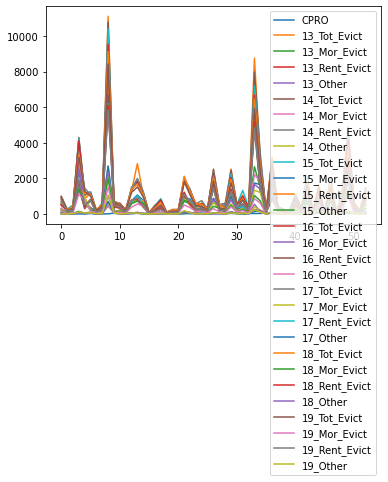

In [13]:
#quick lil plot to make sure we're all good. 
edf2.plot()

Looks like the dataframe isn't a geodataframe. Need to check and change it. 

In [14]:
#check type to see what kind of df 
type(edf2)

pandas.core.frame.DataFrame

In [15]:
# import GeoDataFrame from geopandas
from geopandas import GeoDataFrame

In [16]:
#change from pandas to geopandas
edf2= GeoDataFrame(edf2)

In [17]:
#check type again.
type(edf2)

geopandas.geodataframe.GeoDataFrame

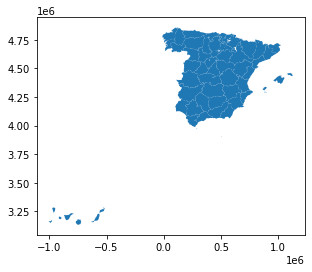

In [18]:
#try simple plot again
edf2.plot()

Looks like Spain to me!!

I want to create a map of the total number of evictions by province. I'll start by creating a total number of eviction column that sums the evictions over the 7 years of available data.

In [19]:
#create new column with sum of total evictions / year
edf2['Sum_Evictions'] = edf2['13_Tot_Evict'] + edf2['14_Tot_Evict'] + edf2['15_Tot_Evict'] + edf2['16_Tot_Evict'] \
+ edf2['17_Tot_Evict'] + edf2['18_Tot_Evict'] + edf2['19_Tot_Evict']
edf2.head()


,CPRO,Province,13_Tot_Evict,13_Mor_Evict,13_Rent_Evict,13_Other,14_Tot_Evict,14_Mor_Evict,14_Rent_Evict,14_Other,...,18_Tot_Evict,18_Mor_Evict,18_Rent_Evict,18_Other,19_Tot_Evict,19_Mor_Evict,19_Rent_Evict,19_Other,geometry,Sum_Evictions
0,15,La Coruña,989,289,619,81,960,330,579,51,...,691,181,488,22,942,182,741,19,"MULTIPOLYGON (((5572.820 4721233.354, 5614.821...",6254
1,1,Álava,243,64,155,24,232,32,175,25,...,258,51,205,2,228,25,201,2,"POLYGON ((537063.531 4703664.589, 536887.844 4...",1720
2,2,Albacete,491,205,268,18,416,178,207,31,...,396,130,250,16,301,88,197,16,"POLYGON ((568861.458 4228498.857, 568863.454 4...",2803
3,3,Alicante,4205,2532,1530,143,4297,2782,1416,99,...,3350,1395,1864,91,3184,1123,1948,113,"MULTIPOLYGON (((701641.529 4201786.197, 701679...",26816
4,4,Almería,853,524,293,36,1045,637,355,53,...,1164,649,449,66,1285,736,499,50,"MULTIPOLYGON (((519527.321 4060404.620, 519513...",8120


In [20]:
#trim the df to include only the sum evictions, name, and geometry. 
sum_evictions = edf2 [['Province', 'geometry', 'Sum_Evictions']]
sum_evictions.head()

,Province,geometry,Sum_Evictions
0,La Coruña,"MULTIPOLYGON (((5572.820 4721233.354, 5614.821...",6254
1,Álava,"POLYGON ((537063.531 4703664.589, 536887.844 4...",1720
2,Albacete,"POLYGON ((568861.458 4228498.857, 568863.454 4...",2803
3,Alicante,"MULTIPOLYGON (((701641.529 4201786.197, 701679...",26816
4,Almería,"MULTIPOLYGON (((519527.321 4060404.620, 519513...",8120


Now I have a trimmed df to map that includes the total evictions of the data we have available. Now to make a chloropleth map. 

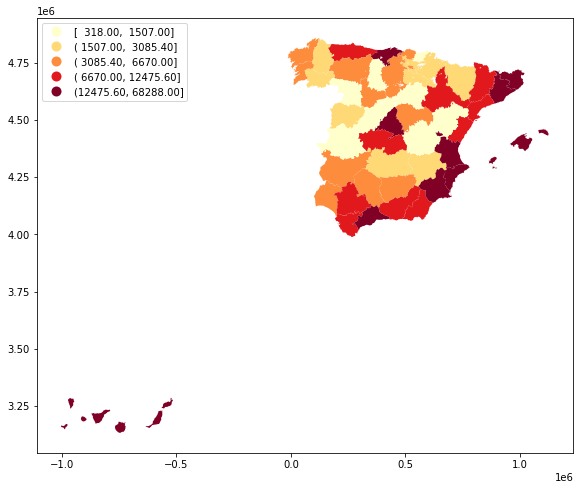

In [41]:
#create a chloropleth map of the total evictions, move the legend to the other side, and export
sum_evictions.plot(figsize=(10,8), 
                 column='Sum_Evictions', cmap= 'YlOrRd',
                 legend=True, 
                 scheme='quantiles', legend_kwds={'loc': 'upper left'})
plt.savefig('Map Total Evictions Spain, 2013-2019.png')


Excellent - I went with a nice topical color for Spain. (Ya know, keeping it thematic.)

## Chart of Eviction Types in Barcelona

To create the chart, I'll need to pull the Barcelona specific information into a new variable. 

I tried a couple methods of changing the orientation of this chart, but ended up with unusual indices. I ended up just creating a list of the variables I wanted and creating a new dataframe. This was certainly not the most efficient method, but it was the workaround I found that worked best. 

I will explore this more later, but I think the index problems I was having would have been solved by flattening the groupby table, but I was trying to fix it beforehand and didn't actually get to that step. I am curious to know, so I'll look into that next week. 

In [22]:
#grab barcelona row into a new variable.
bar_evict = edf2.loc[edf2["Province"] == 'Barcelona']

In [23]:
#show new table.
bar_evict

,CPRO,Province,13_Tot_Evict,13_Mor_Evict,13_Rent_Evict,13_Other,14_Tot_Evict,14_Mor_Evict,14_Rent_Evict,14_Other,...,18_Tot_Evict,18_Mor_Evict,18_Rent_Evict,18_Other,19_Tot_Evict,19_Mor_Evict,19_Rent_Evict,19_Other,geometry,Sum_Evictions
8,8,Barcelona,11101,2329,8127,645,10775,2678,7528,569,...,9131,2012,6100,1019,8424,1518,5848,1058,"MULTIPOLYGON (((892759.402 4571741.315, 892725...",68288


In [24]:
#create a list of the columns I want.
desired_columns = [
 '13_Mor_Evict',
 '13_Rent_Evict',
 '13_Other',
 '14_Mor_Evict',
 '14_Rent_Evict',
 '14_Other',
 '15_Mor_Evict',
 '15_Rent_Evict',
 '15_Other',
 '16_Mor_Evict',
 '16_Rent_Evict',
 '16_Other',
 '17_Mor_Evict',
 '17_Rent_Evict',
 '17_Other',
 '18_Mor_Evict',
 '18_Rent_Evict',
 '18_Other',
 '19_Mor_Evict',
 '19_Rent_Evict',
 '19_Other']

In [25]:
#create a trimmed dataframe only with info needed
bar_evict_trimmed = bar_evict[desired_columns].copy()

In [26]:
#show new df
bar_evict_trimmed.head()

,13_Mor_Evict,13_Rent_Evict,13_Other,14_Mor_Evict,14_Rent_Evict,14_Other,15_Mor_Evict,15_Rent_Evict,15_Other,16_Mor_Evict,...,16_Other,17_Mor_Evict,17_Rent_Evict,17_Other,18_Mor_Evict,18_Rent_Evict,18_Other,19_Mor_Evict,19_Rent_Evict,19_Other
8,2329,8127,645,2678,7528,569,2690,7251,453,2330,...,472,2043,6201,707,2012,6100,1019,1518,5848,1058


Here, I'm creating a whole new dataframe based on the information I need to get this chart in the format I want. (Practice in creating a dataframe, right?) So, I have three lists: the year (which will be the index), the new name of the data titles without the year (which will allow the groupby function), and the values. 

In [27]:
#create list of values - will be third column
bar_values = [
  '2329',
  '8127',
  '645',
  '2678',
  '7528',
  '569',
  '2690',
  '7251',
 '453',
  '2330',
  '6710',
  '472',
  '2043',
  '6201',
  '707',
  '2012',
  '6100',
  '1019',
  '1518',
  '5848',
  '1058']

In [28]:
#create list of type of evictions - will be column 2
evict_type = ['Mortgage Evictions',
 'Rental Evictions',
 'Other',
 'Mortgage Evictions',
 'Rental Evictions',
 'Other',
 'Mortgage Evictions',
 'Rental Evictions',
 'Other',
 'Mortgage Evictions',
 'Rental Evictions',
 'Other',
 'Mortgage Evictions',
 'Rental Evictions',
 'Other',
 'Mortgage Evictions',
 'Rental Evictions',
 'Other',
 'Mortgage Evictions',
 'Rental Evictions',
 'Other']

In [29]:
#create list of values to pass to new column - will be column 1 and index
list_years = ["2013","2013", "2013", "2014", "2014", "2014", "2015","2015", "2015", \
              "2016","2016", "2016", "2017", "2017", "2017", "2018","2018", "2018", \
              "2019","2019", "2019"]


In [30]:
#create empty dataframe
nbedf = pd.DataFrame()

In [31]:
#pass in the first column
nbedf['Year']  = list_years

In [32]:
#pass in second column
nbedf['Type of Eviction']  = evict_type

In [33]:
#pass in third column & hope it works
nbedf['Number of Evictions']  = bar_values

I now have a new dataframe! I need to check the data type to make sure the numbers are integers.

In [34]:
#check the data type
nbedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Year                 21 non-null     object
 1   Type of Eviction     21 non-null     object
 2   Number of Evictions  21 non-null     object
dtypes: object(3)
memory usage: 632.0+ bytes


In [35]:
#change type of number of evictions
nbedf['Number of Evictions'] = nbedf['Number of Evictions'].astype(int)

In [36]:
#group by the year, sum the number of evictions
bedf_grouped=nbedf.groupby(['Year','Type of Eviction']).sum()[['Number of Evictions']]
bedf_grouped.head()

Number of Evictions
Year Type of Eviction                       
2013 Mortgage Evictions                 2329
     Other                               645
     Rental Evictions                   8127
2014 Mortgage Evictions                 2678
     Other                               569

Now I have a group of the type of evictions, and the number of evictions with seemingly two indexes. This flattening code below is where it seems like I could have fixed my index problems.

This is the code I was using to swap the axes:

barcelona_evict = bar_evict_trimmed.swapaxes("index", "columns", copy=True)

In [37]:
# flatten the multi-index, multi-level dataframe
bedf_flat = bedf_grouped.reset_index()
bedf_flat.head()

,Year,Type of Eviction,Number of Evictions
0,2013,Mortgage Evictions,2329
1,2013,Other,645
2,2013,Rental Evictions,8127
3,2014,Mortgage Evictions,2678
4,2014,Other,569


In [42]:
# make a stacked bar chart
stacked_evict = px.bar(bedf_flat,
       x='Year',
       y='Number of Evictions',
       color='Type of Eviction' 
      )
stacked_evict

And there we have it!